In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
train_dataset = dsets.MNIST(root='./data',
              train=True,
              transform = transforms.ToTensor(),
              download=True)

test_dataset = dsets.MNIST(root='./data',
              train=False,
              transform = transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 509kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 15.3MB/s]


In [3]:
import torch.utils.data as Data

In [4]:
num_epochs = 10
batch_size = 100
learning_rate = 0.005
num_test_img = 5

In [5]:
train_loader = Data.DataLoader(dataset=train_dataset,
                batch_size=batch_size,
                shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset,
                batch_size=batch_size,
                shuffle=False)

In [6]:
import torch.nn as nn

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
      super(AutoEncoder, self).__init__()
      self.encoder = nn.Sequential(
         nn.Linear(28*28, 128),
         nn.Tanh(),
         nn.Linear(128, 64),
         nn.Tanh(),
         nn.Linear(64, 12),
         nn.Tanh(),
         nn.Linear(12, 3),
      )
      self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.Tanh(),
        nn.Linear(12, 64),
        nn.Tanh(),
        nn.Linear(64, 128),
        nn.Tanh(),
        nn.Linear(128, 28*28),
      )
    def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return encoded, decoded

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [9]:
autoencoder = AutoEncoder()
autoencoder

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [10]:
import torch.optim as optim

In [11]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

In [12]:
view_data = Variable(train_dataset.data[:num_test_img].view(-1, 28*28).type(torch.FloatTensor)/255.)

In [34]:
view_data

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

epoch: 0, loss: 0.1170


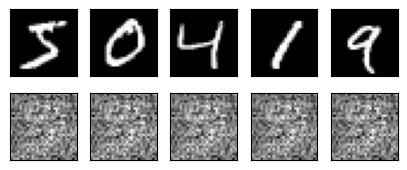

epoch: 0, loss: 0.0542


epoch: 0, loss: 0.0534


epoch: 0, loss: 0.0514


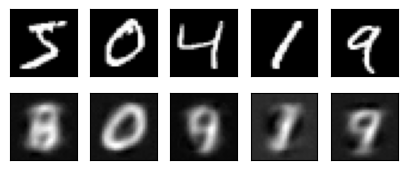

epoch: 0, loss: 0.0483


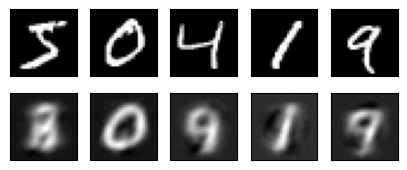

epoch: 0, loss: 0.0478


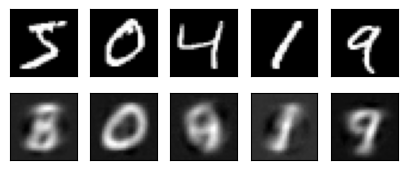

epoch: 1, loss: 0.0445


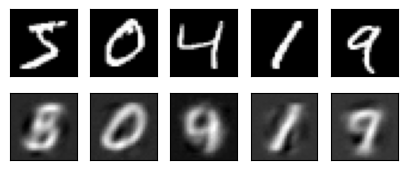

epoch: 1, loss: 0.0456


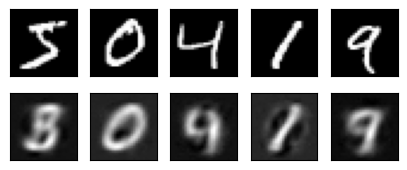

epoch: 1, loss: 0.0446


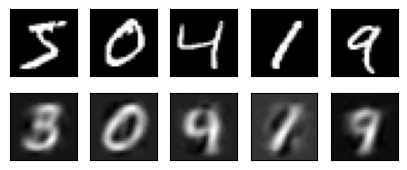

epoch: 1, loss: 0.0409


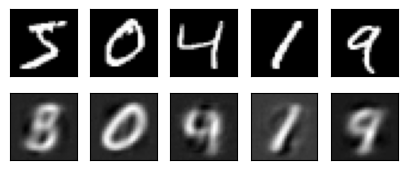

epoch: 1, loss: 0.0432


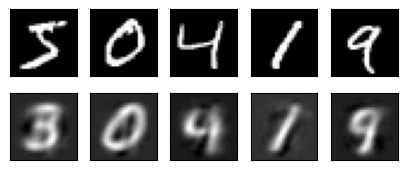

epoch: 1, loss: 0.0428


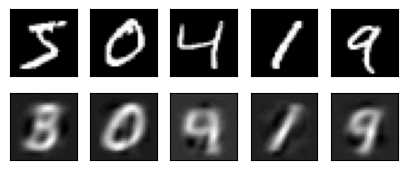

epoch: 2, loss: 0.0421


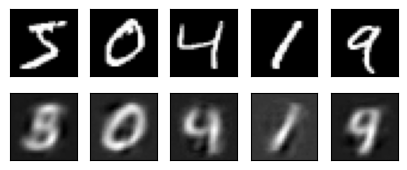

epoch: 2, loss: 0.0427


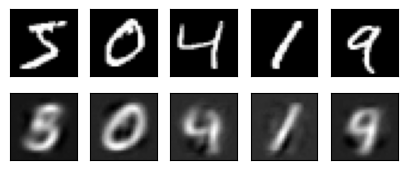

epoch: 2, loss: 0.0447


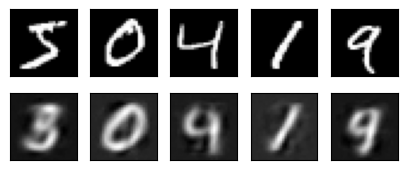

epoch: 2, loss: 0.0437


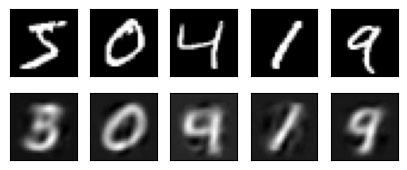

epoch: 2, loss: 0.0451


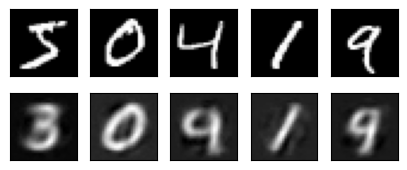

epoch: 2, loss: 0.0400


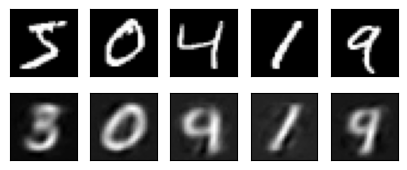

epoch: 3, loss: 0.0410


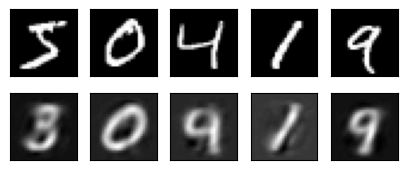

epoch: 3, loss: 0.0410


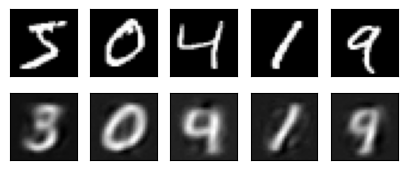

epoch: 3, loss: 0.0414


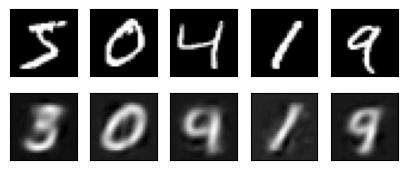

epoch: 3, loss: 0.0442


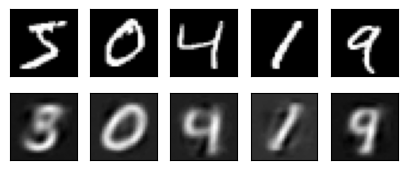

epoch: 3, loss: 0.0422


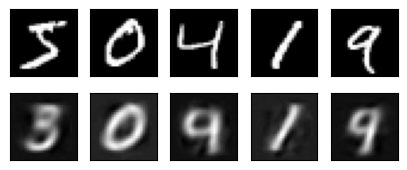

epoch: 3, loss: 0.0375


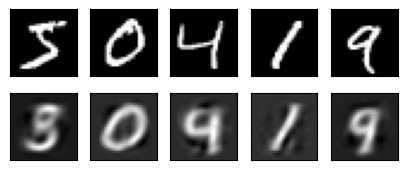

epoch: 4, loss: 0.0403


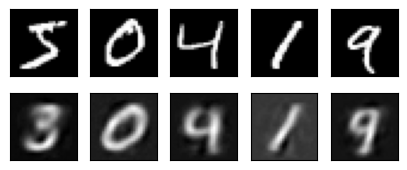

epoch: 4, loss: 0.0412


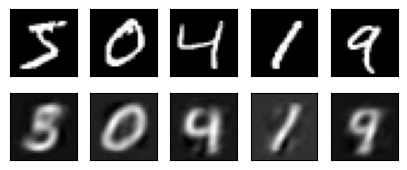

epoch: 4, loss: 0.0417


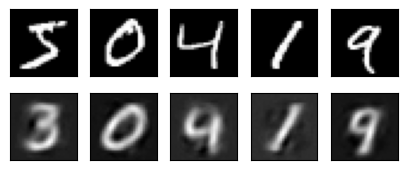

epoch: 4, loss: 0.0415


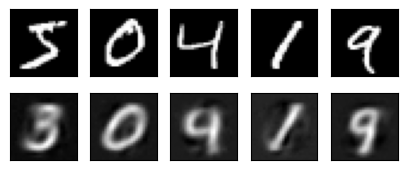

epoch: 4, loss: 0.0414


epoch: 4, loss: 0.0421


epoch: 5, loss: 0.0409


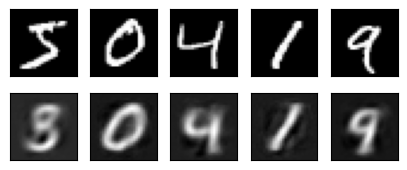

epoch: 5, loss: 0.0391


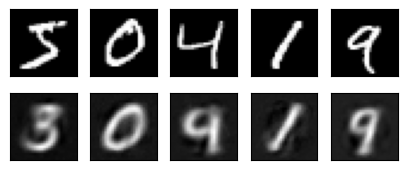

epoch: 5, loss: 0.0398


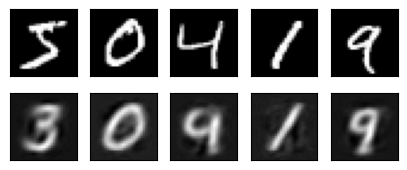

epoch: 5, loss: 0.0399


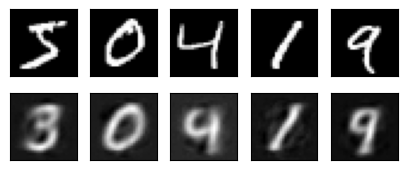

epoch: 5, loss: 0.0419


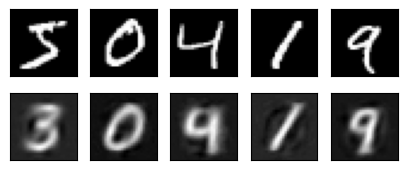

epoch: 5, loss: 0.0404


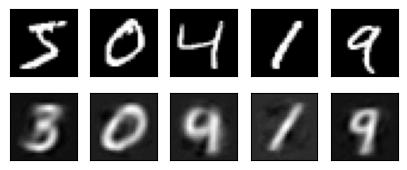

epoch: 6, loss: 0.0403


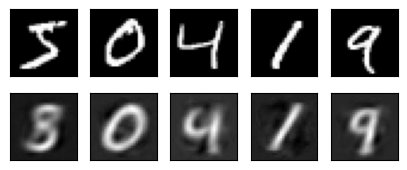

epoch: 6, loss: 0.0392


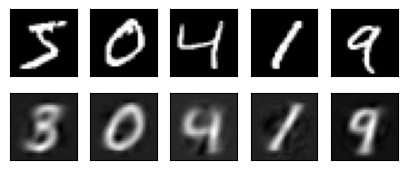

epoch: 6, loss: 0.0374


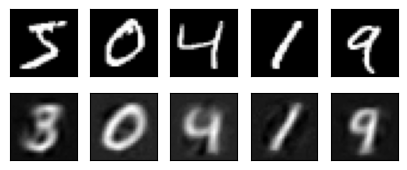

epoch: 6, loss: 0.0399


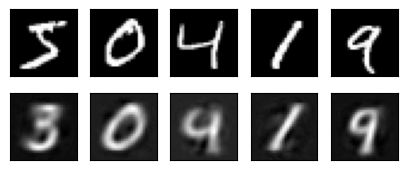

epoch: 6, loss: 0.0365


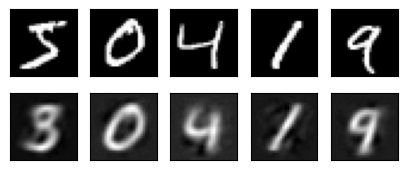

epoch: 6, loss: 0.0415


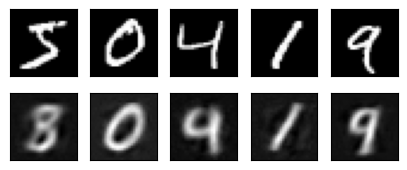

epoch: 7, loss: 0.0382


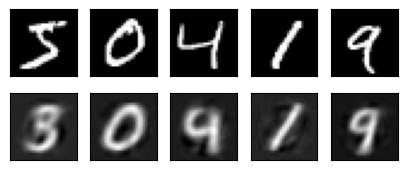

epoch: 7, loss: 0.0422


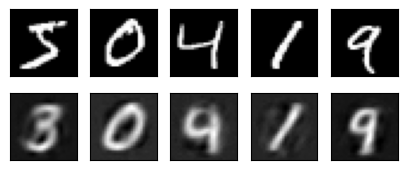

epoch: 7, loss: 0.0411


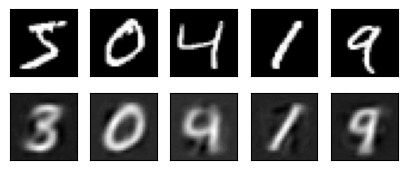

epoch: 7, loss: 0.0410


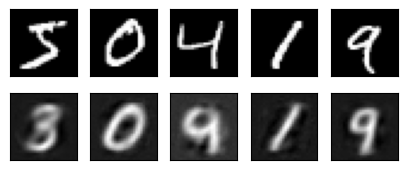

epoch: 7, loss: 0.0393


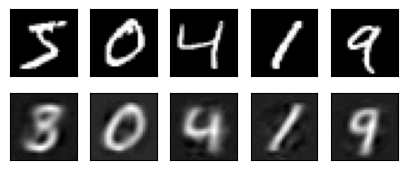

epoch: 7, loss: 0.0400


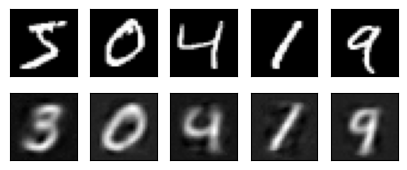

epoch: 8, loss: 0.0419


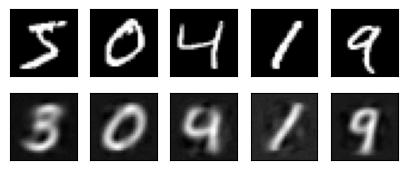

epoch: 8, loss: 0.0381


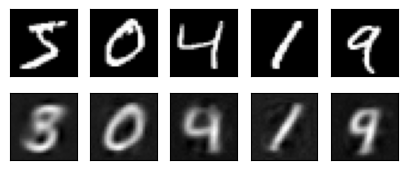

epoch: 8, loss: 0.0385


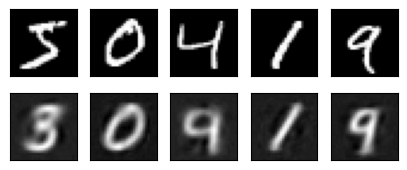

epoch: 8, loss: 0.0384


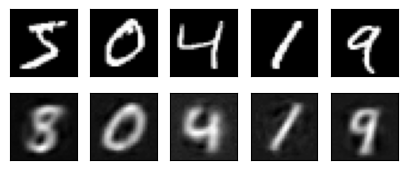

epoch: 8, loss: 0.0358


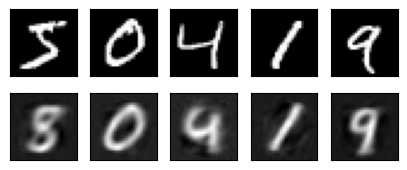

epoch: 8, loss: 0.0376


epoch: 9, loss: 0.0389


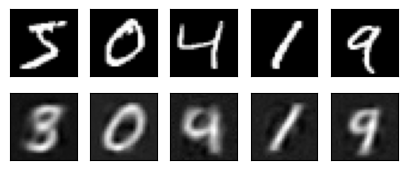

epoch: 9, loss: 0.0401


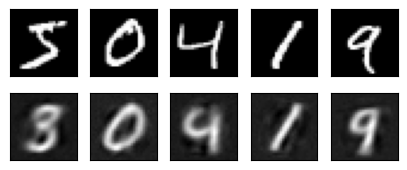

epoch: 9, loss: 0.0369


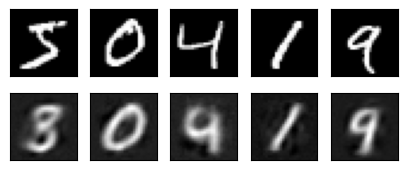

epoch: 9, loss: 0.0390


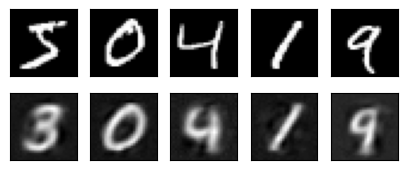

epoch: 9, loss: 0.0343


epoch: 9, loss: 0.0379


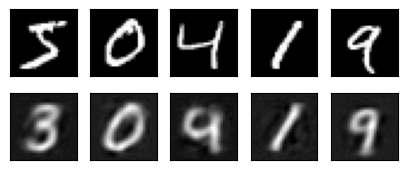

In [14]:
for epoch in range(num_epochs):
  for i, (x,y) in enumerate(train_loader):
    b_x = Variable(x.view(-1, 28*28))
    b_y = Variable(x.view(-1, 28*28))
    b_labels = Variable(y)

    optimizer.zero_grad()
    encoded, decoded = autoencoder(b_x)
    loss = loss_fn(decoded, b_y)
    loss.backward()
    optimizer.step()

    if i % 100 ==0:
      print("epoch: %d, loss: %.4f"%(epoch, loss.data))
      _, decoded_data = autoencoder(view_data)
      f, a = plt.subplots(2, num_test_img, figsize=(5, 2))
      for j in range(num_test_img):
        a[0][j].imshow(np.reshape(view_data.data.numpy()[j], (28, 28), ), cmap='gray')
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())

        a[1][j].imshow(np.reshape(decoded_data.data.numpy()[j], (28, 28)), cmap='gray')
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())

      plt.draw()
      plt.show()

In [15]:
m = nn.ConvTranspose2d(1,1,kernel_size=3, stride=3)
a = torch.FloatTensor([[[[1,2,3],[4,5,6],[7,8,9]]]])
print(a.shape)

torch.Size([1, 1, 3, 3])


In [16]:
b=m(a)
print(b.shape)
b

torch.Size([1, 1, 9, 9])


tensor([[[[-0.2527, -0.1622,  0.1927, -0.5422, -0.3612,  0.3487, -0.8316,
           -0.5601,  0.5047],
          [-0.1210,  0.1589,  0.2065, -0.2787,  0.2812,  0.3763, -0.4364,
            0.4034,  0.5462],
          [ 0.2461,  0.3663,  0.0854,  0.4556,  0.6959,  0.1341,  0.6650,
            1.0254,  0.1828],
          [-1.1210, -0.7591,  0.6607, -1.4105, -0.9580,  0.8167, -1.6999,
           -1.1569,  0.9727],
          [-0.5941,  0.5257,  0.7160, -0.7518,  0.6479,  0.8858, -0.9095,
            0.7701,  1.0556],
          [ 0.8745,  1.3550,  0.2315,  1.0839,  1.6846,  0.2802,  1.2934,
            2.0142,  0.3289],
          [-1.9893, -1.3559,  1.1287, -2.2787, -1.5548,  1.2847, -2.5682,
           -1.7538,  1.4407],
          [-1.0673,  0.8924,  1.2254, -1.2250,  1.0146,  1.3952, -1.3827,
            1.1369,  1.5651],
          [ 1.5028,  2.3438,  0.3776,  1.7123,  2.6734,  0.4263,  1.9217,
            3.0029,  0.4750]]]], grad_fn=<ConvolutionBackward0>)

In [21]:
class AutoEncoderCNN(nn.Module):
    def __init__(self):
      super(AutoEncoderCNN, self).__init__()
      self.encoder = nn.Sequential(
          nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=7, stride=1),
      )
      self.decoder = nn.Sequential(
          nn.ConvTranspose2d(64, 32, kernel_size=7, stride=1),
          nn.ReLU(),
          nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
          nn.ReLU(),
          nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
          nn.Sigmoid()
      )
    def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return encoded, decoded

In [22]:
autoencoderCNN = AutoEncoderCNN()
autoencoderCNN.cuda()

AutoEncoderCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=7, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [35]:
view_dataCNN = Variable(train_dataset.data[:num_test_img].view(-1, 1, 28, 28).type(torch.cuda.FloatTensor)/255.)

In [36]:
loss_fn = nn.MSELoss()
optimizerCNN = optim.Adam(autoencoderCNN.parameters(), lr=learning_rate)

epoch: 0, loss: 0.1591


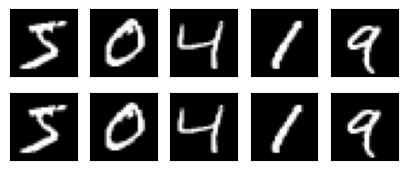

epoch: 0, loss: 0.1597


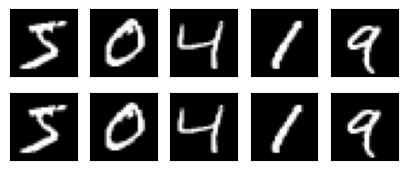

epoch: 0, loss: 0.1588


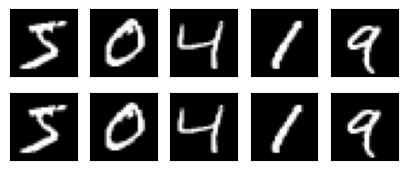

epoch: 0, loss: 0.1611


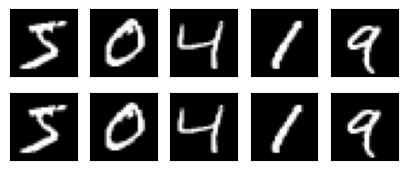

epoch: 0, loss: 0.1593


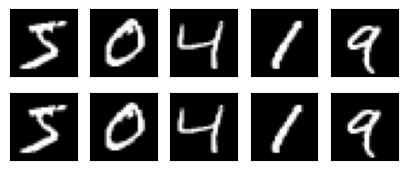

epoch: 0, loss: 0.1603


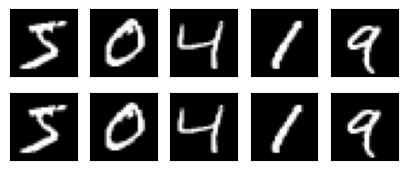

epoch: 1, loss: 0.1613


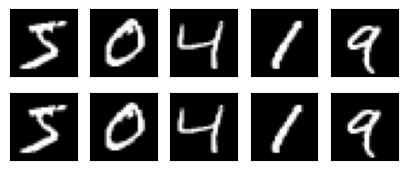

epoch: 1, loss: 0.1603


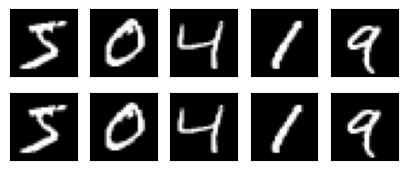

epoch: 1, loss: 0.1604


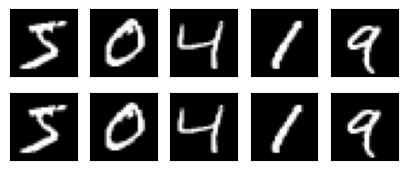

epoch: 1, loss: 0.1618


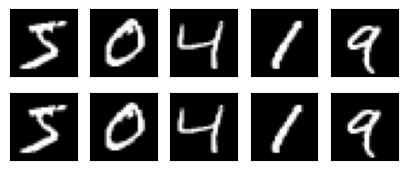

epoch: 1, loss: 0.1604


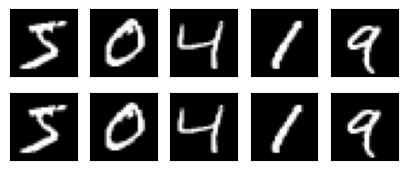

epoch: 1, loss: 0.1609


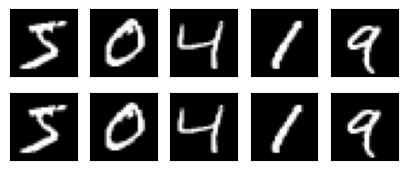

epoch: 2, loss: 0.1597


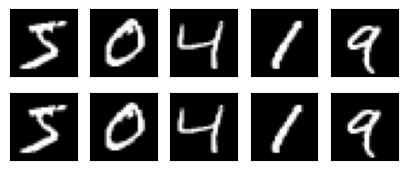

epoch: 2, loss: 0.1597


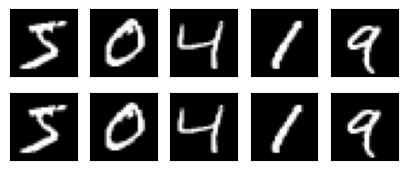

epoch: 2, loss: 0.1599


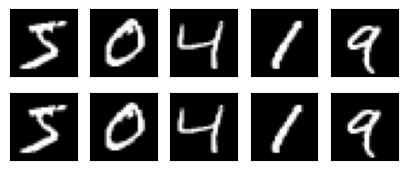

epoch: 2, loss: 0.1602


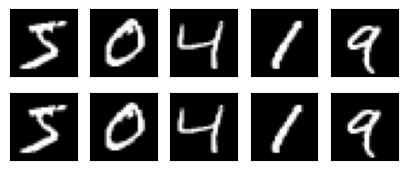

epoch: 2, loss: 0.1593


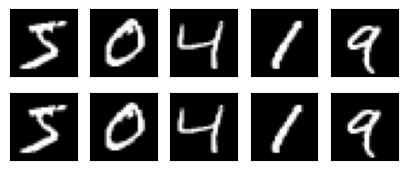

epoch: 2, loss: 0.1603


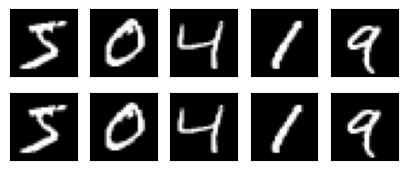

epoch: 3, loss: 0.1589


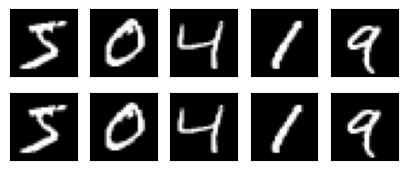

epoch: 3, loss: 0.1620


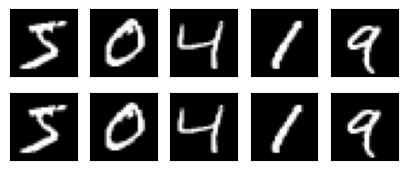

epoch: 3, loss: 0.1607


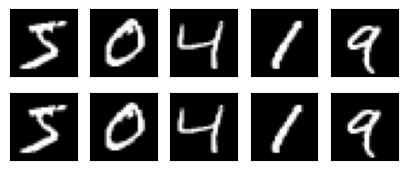

epoch: 3, loss: 0.1607


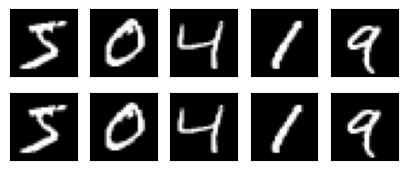

epoch: 3, loss: 0.1600


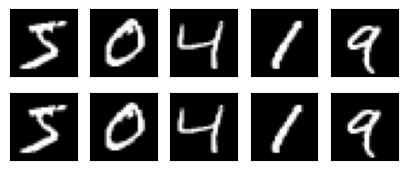

epoch: 3, loss: 0.1596


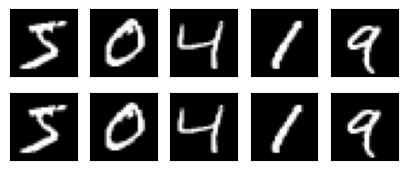

epoch: 4, loss: 0.1592


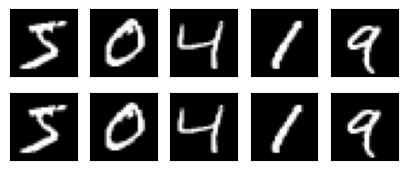

epoch: 4, loss: 0.1592


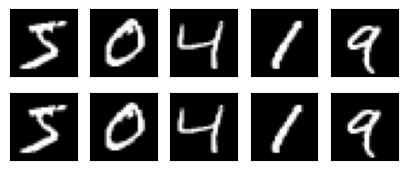

epoch: 4, loss: 0.1585


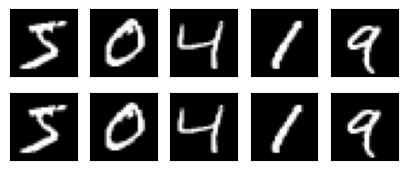

epoch: 4, loss: 0.1616


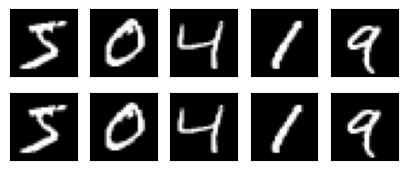

epoch: 4, loss: 0.1588


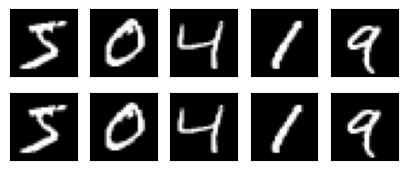

epoch: 4, loss: 0.1593


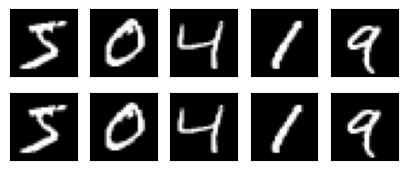

epoch: 5, loss: 0.1603


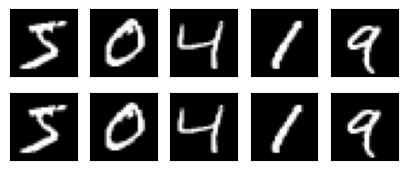

epoch: 5, loss: 0.1599


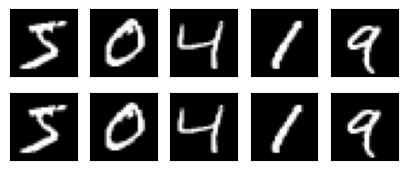

epoch: 5, loss: 0.1608


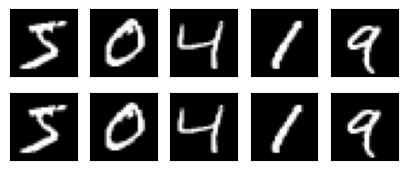

epoch: 5, loss: 0.1604


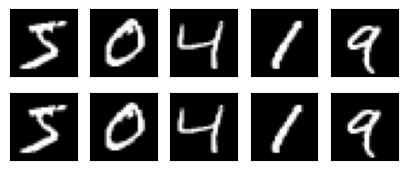

epoch: 5, loss: 0.1607


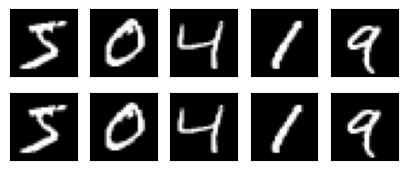

epoch: 5, loss: 0.1594


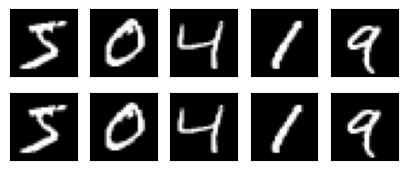

epoch: 6, loss: 0.1601


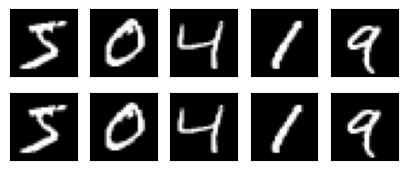

epoch: 6, loss: 0.1610


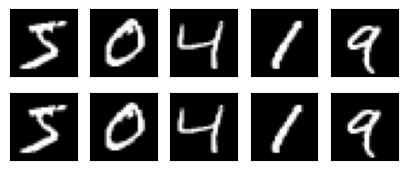

epoch: 6, loss: 0.1587


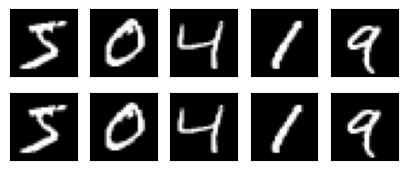

epoch: 6, loss: 0.1611


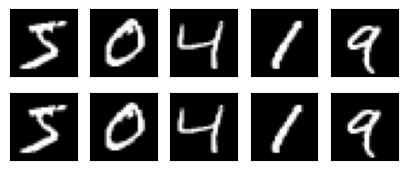

epoch: 6, loss: 0.1599


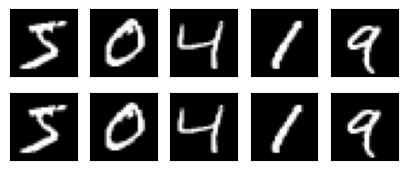

epoch: 6, loss: 0.1590


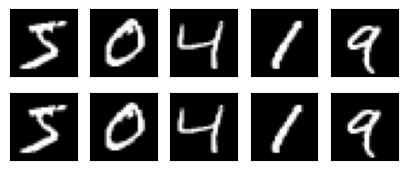

epoch: 7, loss: 0.1602


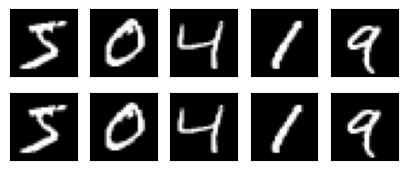

epoch: 7, loss: 0.1601


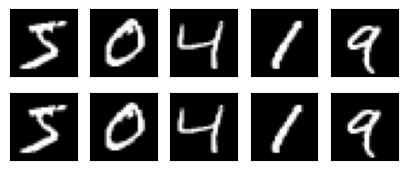

epoch: 7, loss: 0.1602


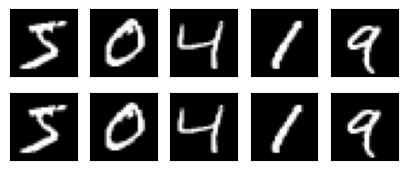

epoch: 7, loss: 0.1594


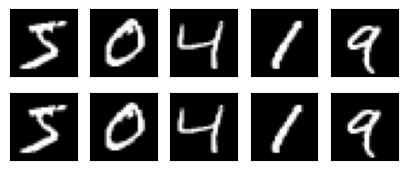

epoch: 7, loss: 0.1603


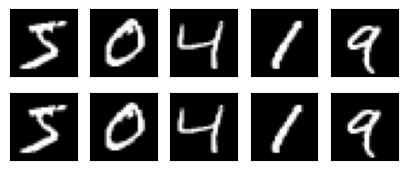

epoch: 7, loss: 0.1607


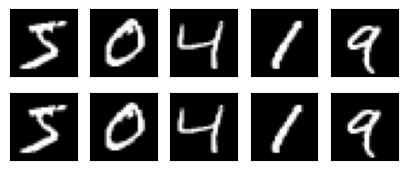

epoch: 8, loss: 0.1604


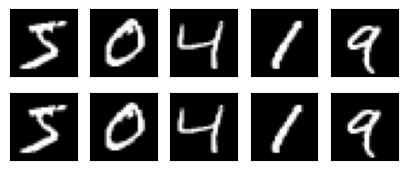

epoch: 8, loss: 0.1601


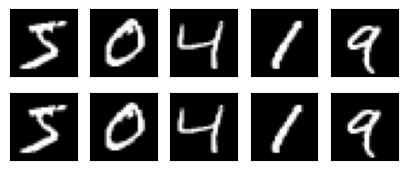

epoch: 8, loss: 0.1597


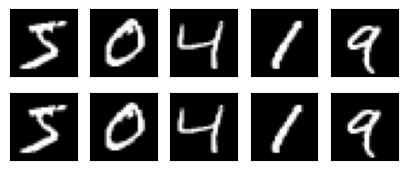

epoch: 8, loss: 0.1604


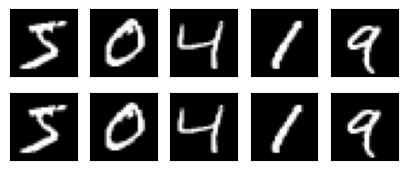

epoch: 8, loss: 0.1595


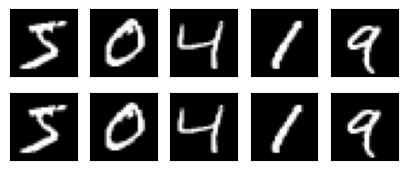

epoch: 8, loss: 0.1603


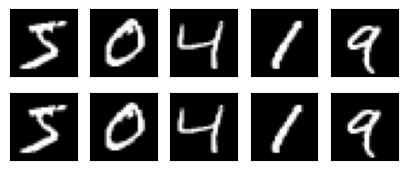

epoch: 9, loss: 0.1594


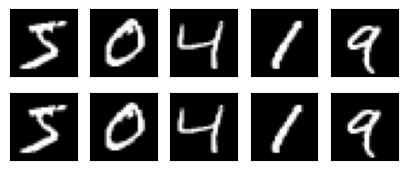

epoch: 9, loss: 0.1616


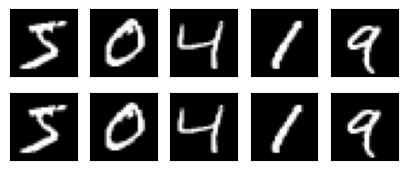

epoch: 9, loss: 0.1609


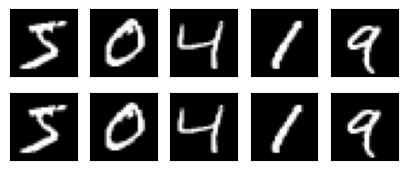

epoch: 9, loss: 0.1601


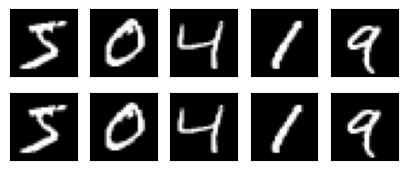

epoch: 9, loss: 0.1601


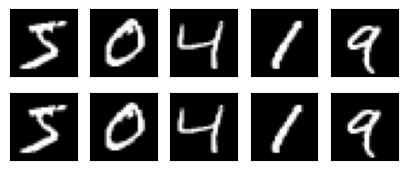

epoch: 9, loss: 0.1601


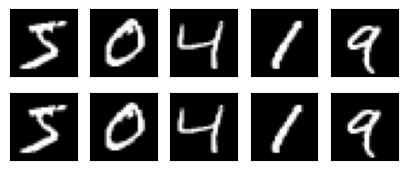

In [38]:
for epoch in range(num_epochs):
  for i, (x,y) in enumerate(train_loader):
    b_x = Variable(x).cuda()
    b_y = Variable(x).cuda()
    b_labels = Variable(y)

    optimizer.zero_grad()
    encoded, decoded = autoencoderCNN(b_x)
    loss = loss_fn(decoded, b_y)
    loss.backward()
    optimizer.step()

    if i % 100 ==0:
      print("epoch: %d, loss: %.4f"%(epoch, loss.data))
      _, decoded_data = autoencoderCNN(view_dataCNN)
      f, a = plt.subplots(2, num_test_img, figsize=(5, 2))
      for j in range(num_test_img):
        a[0][j].imshow(np.reshape(view_dataCNN.cpu().data.numpy()[j], (28, 28), ), cmap='gray')
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())

        a[1][j].imshow(np.reshape(view_dataCNN.cpu().data.numpy()[j], (28, 28)), cmap='gray')
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())

      plt.draw()
      plt.show()